## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [26]:
from pylab import *
import matplotlib.pyplot as mpl
%matplotlib inline

In [33]:
def is_closed(A, B, C):
    if B**2 - 4 * A * C < 0:
        return True
    else:
        return False

def is_parabola(A, B, C):
    if B**2 - 4 * A * C == 0:
        return True
    else:
        return False

def is_hyperbole(A, B, C):
    if not is_closed(A, B, C) and not is_parabel(A, B, C):
        return True
    else:
        return False

Die Koeffizienten sind:
A =  0.982733298509
B =  0.956731246416
C =  0.958617791605
D =  1.00987492995
E =  1.02591761782
Die Kurve ist geschlossen.


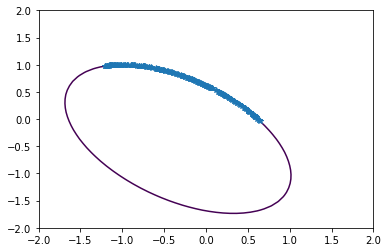

In [34]:
data=np.loadtxt('orbit.dat')
#print(data.shape)

# function to calc f(x,y) 

def f(x,y,A,B,C,D,F):
    result = A * x**2 + B * x * y + C * y**2 + D * x + E * y
    return result

x=data[:,0]
y=data[:,1]

N = data.shape[0]

# variables matrix

v = np.ones((N,5))

# result vector

r = np.ones((N,1))

# fill matrix with values

for i in range(N):
    v[i][0] = x[i]**2
    v[i][1] = x[i] * y[i]
    v[i][2] = y[i]**2
    v[i][3] = x[i]
    v[i][4] = y[i]

# solve with method of least squares    

result = np.linalg.lstsq(v, r)[0]

# define and assign coefficents

A = result[0][0]
B = result[1][0]
C = result[2][0]
D = result[3][0]
E = result[4][0]

# print coefficents

print("Die Koeffizienten sind:")
print("A = ",A)
print("B = ",B)
print("C = ",C)
print("D = ",D)
print("E = ",E)

if is_closed(A, B, C):
    print("Die Kurve ist geschlossen.")
else:
    print("Die Kurve ist offen.")

# create two dimensional interval

xg,yg = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))

# plot calculated curve

mpl.contour(xg,yg,f(xg,yg,A,B,C,D,E),[1])

# plot data points

plot(data[:,0],data[:,1], "*")

show()

In [29]:
x=data[:,0]
y=data[:,1]

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

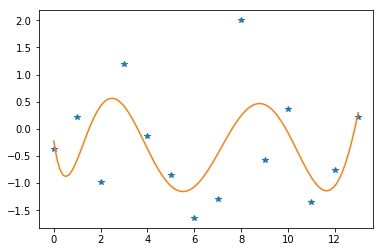

In [30]:
# solves lgs with degree N and returns coefficents

def polyfit(x,y,N=0):
    N += 1
    c = np.zeros((x.shape[0], N))
    
    for i in range(x.shape[0]):
        for j in range(N):
            c[i][j] = x[i]**j
    
    result = np.linalg.lstsq(c,y)[0]

    return result

# calculate the polynom

def polycalc(x,c):
    
    result = np.zeros(x.shape)
    
    for j in range(len(c)):
        result += c[j]*x**j
    
    return result

# Set polynomial degree

N = 14    

# random x and y values

x = np.array([x for x in range(N)])
y = np.array(np.random.randn(N))

# solve to get coefficents

c = polyfit(x,y,7)

# plot random points which were defined before

plot(x,y,"*")

# create interval from first to last point

x = np.linspace(x[0],x[-1],100)

# plot the interpolated spline 

plot(x,polycalc(x,c))

show()

[ 0.61802525 -0.72122049 -0.35953914 -0.09245555 -0.08053382 -0.00784994]


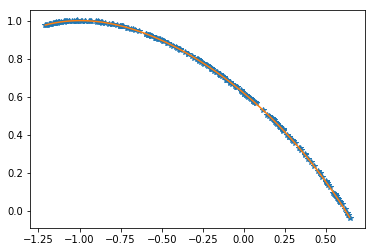

Das Polynom, welches die Daten aus Aufgabe 1 beschreibt lautet: 
 f(x) = 0.6180 * x ^ 0 + -0.7212 * x^1 + -0.3595 * x^2 + -0.0925 * x^3 + -0.0805 * x^4 + -0.0078 * x^5


In [35]:
data=np.loadtxt('orbit.dat')

x=data[:,0]
y=data[:,1]


c = polyfit(x,y,5)

print(c)

plot(x,y,"*")

x = np.linspace(x[0],x[-1],100)

plot(x,polycalc(x,c))

show()

print("Das Polynom, welches die Daten aus Aufgabe 1 beschreibt lautet: \n f(x) = %2.4f * x ^ 0 + %2.4f * x^1 + %2.4f * x^2 + %2.4f * x^3 + %2.4f * x^4 + %2.4f * x^5" % (c[0],c[1],c[2],c[3],c[4],c[5]))